In [1]:
folder = 'log/'
files = ! ls $folder
print(files)

['0', '20211107203449', '20211107204815', '20211107205317', '20211107205516', '20211107205627', '20211107205751', '20211107210126', '20211107210147', '20211107212330', '20211107212527', '20211107212652', '20211114122413', '20211114122438', '20211114122651', '20211114151252', '20211114151422', 'gym_CartPole-v1_False_20210707103630', 'gym_CartPole-v1_False_20210707103718', 'gym_CartPole-v1_False_20210707103837', 'gym_CartPole-v1_False_20210707103900', 'gym_CartPole-v1_False_20210707104304', 'gym_CartPole-v1_False_20210707104329', 'gym_CartPole-v1_False_20210707104400', 'gym_CartPole-v1_False_20210707104547', 'gym_CartPole-v1_False_20210707104604', 'gym_CartPole-v1_False_20210707104619', 'gym_CartPole-v1_False_20210707134456', 'gym_CartPole-v1_False_20210707171454', 'gym_CartPole-v1_False_PPO_20210820151720', 'gym_CartPole-v1_False_PPO_20210820151749', 'gym_CartPole-v1_False_PPO_20210820151909', 'gym_CartPole-v1_False_PPO_20210820152208', 'gym_CartPole-v1_False_PPO_20210820152524', 'gym_C

In [2]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    for (k, v), c in zip(data.items(), colors):
#         if label=='RL loss':
        v=v
        plt.plot(smooth(v[:range], radius=smooth_radius), color=c, label=k)
        plt.plot(v[:range], color=c, alpha=0.3)
    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)
    
img_path = 'generated_img/'

log/slimevolley_SlimeVolley-v0_False_DQN_20210709112958
dict_keys(['episode_reward', 'loss', 'episode_length'])


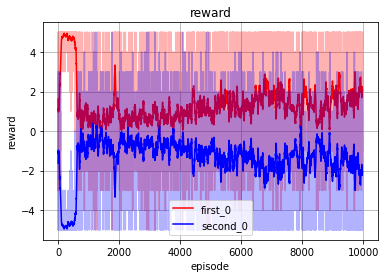

In [128]:
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210709112958'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

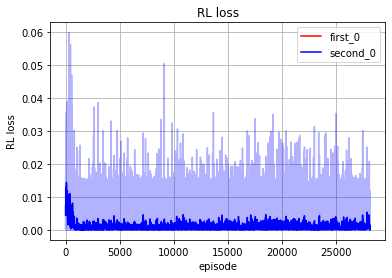

In [129]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

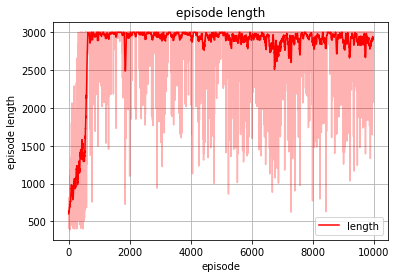

In [130]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/slimevolley_SlimeVolley-v0_False_DQN_20210709135033
dict_keys(['episode_reward', 'loss', 'episode_length'])


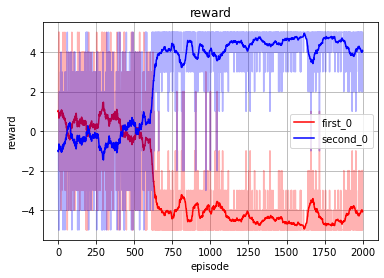

In [113]:
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210709135033'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

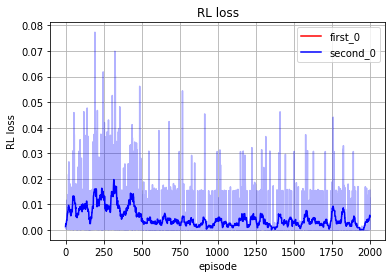

In [114]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

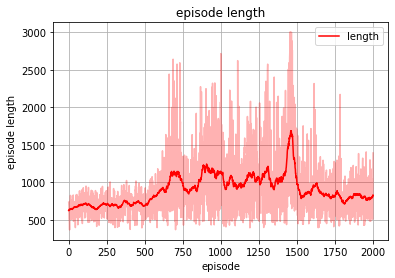

In [115]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/pettingzoo_boxing_v1_False_DQN_20210709173149
dict_keys(['episode_reward', 'loss', 'episode_length'])


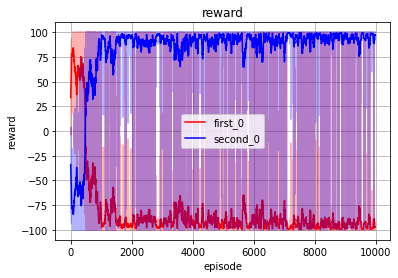

In [131]:
file_name =  'pettingzoo_boxing_v1_False_DQN_20210709173149'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

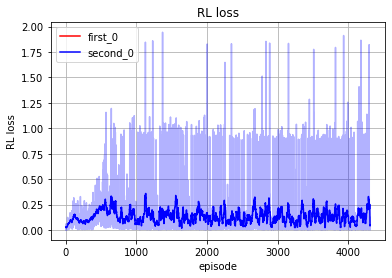

In [132]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

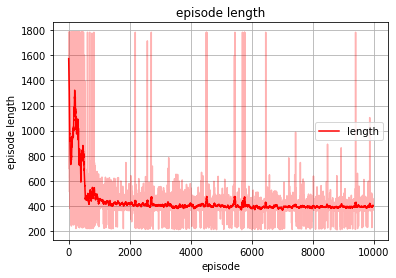

In [133]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/pettingzoo_boxing_v1_False_DQN_20210715105651
dict_keys(['episode_reward', 'loss', 'episode_length'])


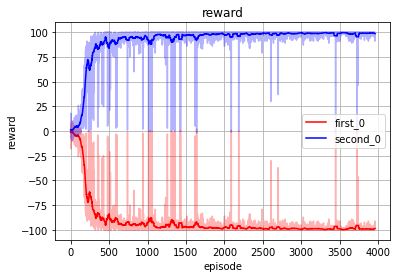

In [146]:
file_name =  'pettingzoo_boxing_v1_False_DQN_20210715105651'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

log/gym_CartPole-v1_False_DQN_20210722105534
dict_keys(['episode_reward', 'loss', 'episode_length'])


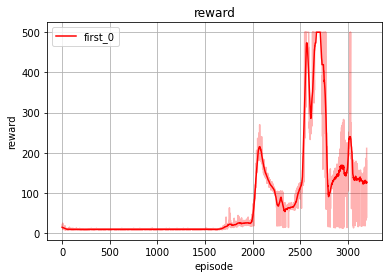

In [8]:
file_name =  'gym_CartPole-v1_False_DQN_20210722105534'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

log/gym_CartPole-v1_False_PPO_20210722104135
dict_keys(['episode_reward', 'loss', 'episode_length'])


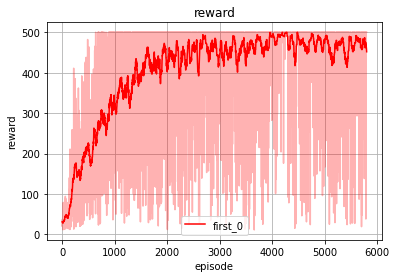

In [9]:
file_name =  'gym_CartPole-v1_False_PPO_20210722104135'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

log/slimevolley_SlimeVolley-v0_False_DQN_20210722111248
dict_keys(['episode_reward', 'loss', 'episode_length'])


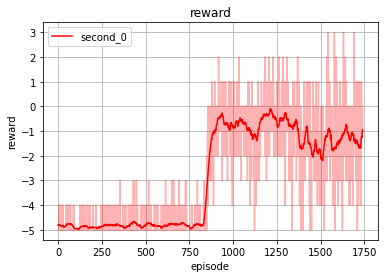

In [20]:
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210722111248'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

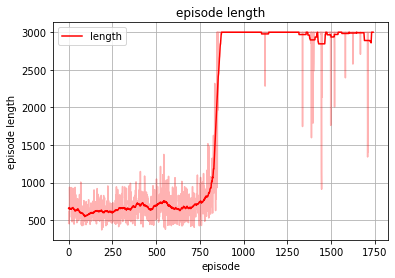

In [21]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/slimevolley_SlimeVolley-v0_False_PPO_20210722120311
dict_keys(['episode_reward', 'loss', 'episode_length'])


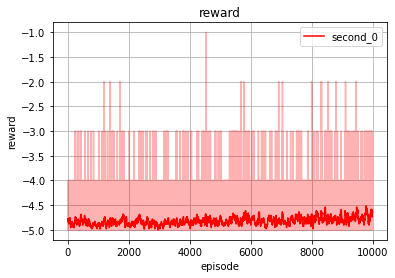

In [40]:
file_name =  'slimevolley_SlimeVolley-v0_False_PPO_20210722120311'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

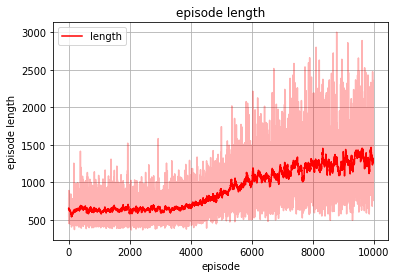

In [41]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

log/slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210723162318
dict_keys(['episode_reward', 'loss', 'episode_length'])


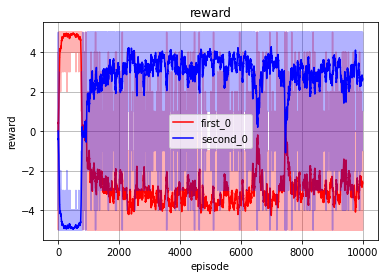

In [75]:
# exploit nash dqn exploiter, bad model
file_name =  'slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210723162318'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

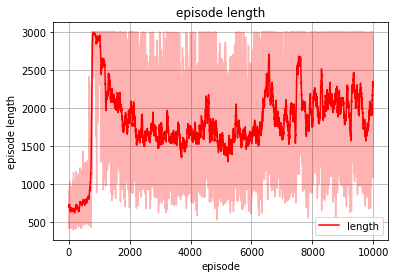

In [76]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

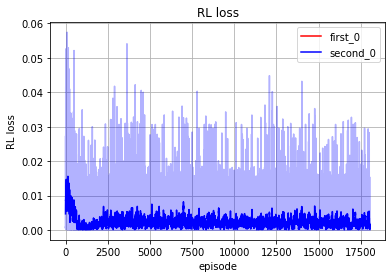

In [77]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210724150911
dict_keys(['episode_reward', 'loss', 'episode_length'])


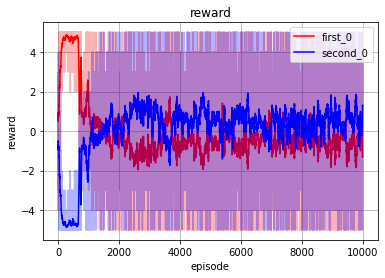

In [81]:
# exploit nash dqn exploiter, good model, 2800*5 episodes
file_name =  'slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210724150911'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

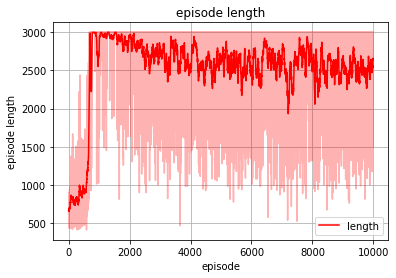

In [82]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

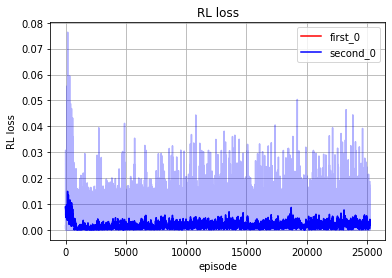

In [83]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210729170634
dict_keys(['episode_reward', 'loss', 'episode_length'])


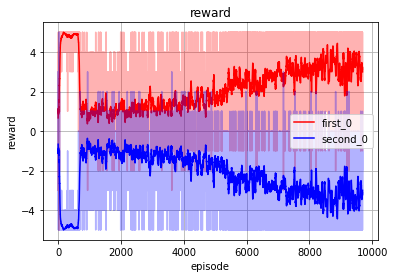

In [7]:
# exploit nash dqn exploiter, good model, 3500*5 episodes
file_name =  'slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210729170634'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

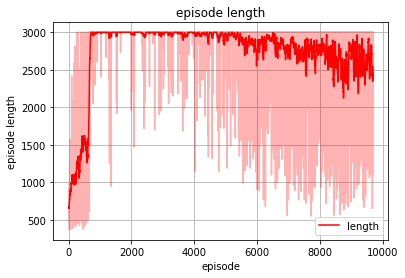

In [8]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

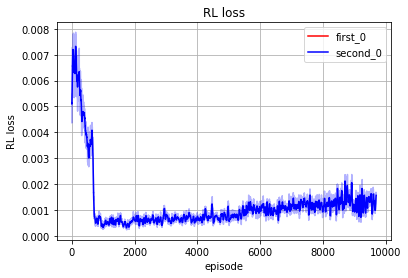

In [9]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_False_DQN_20210726160205
dict_keys(['episode_reward', 'loss', 'episode_length'])


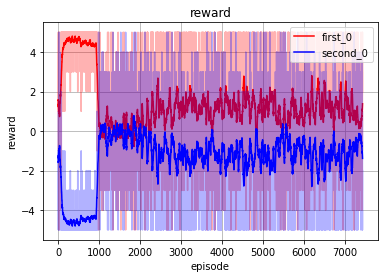

In [5]:
# exploit SV large net with small net
file_name =  'slimevolley_SlimeVolley-v0_False_DQN_20210726160205'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

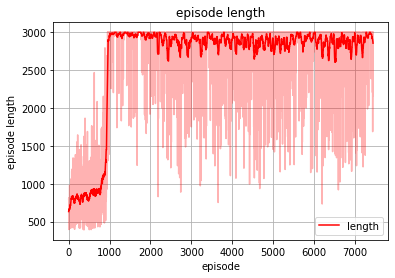

In [6]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

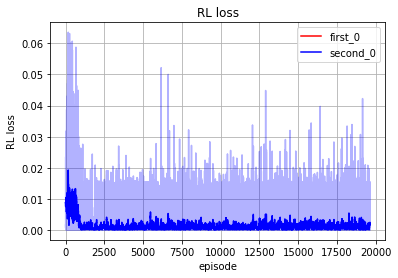

In [7]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/pettingzoo_boxing_v1_nash_NashDQNExploiter_20210726115141
dict_keys(['episode_reward', 'loss', 'episode_length'])


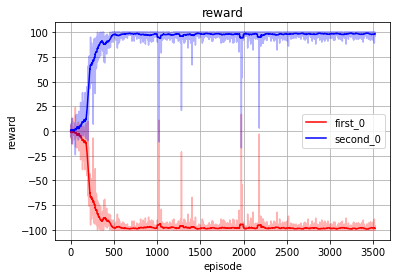

In [93]:
# exploit nash dqn exploiter, boxing
file_name =  'pettingzoo_boxing_v1_nash_NashDQNExploiter_20210726115141'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

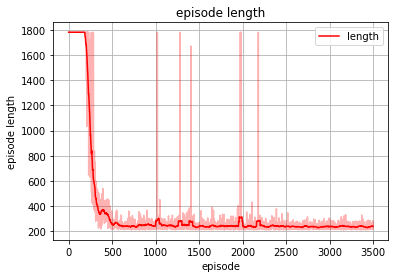

In [47]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

In [ ]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/pettingzoo_boxing_v1_nfsp_NFSP_20210823163305
dict_keys(['episode_reward', 'loss', 'episode_length'])


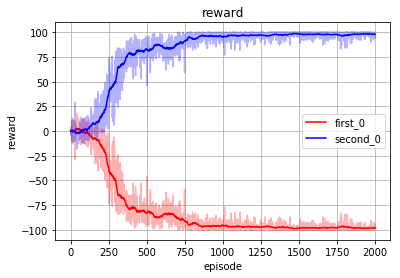

In [26]:
# exploit nfsp, boxing, not trained
file_name =  'pettingzoo_boxing_v1_nfsp_NFSP_20210823163305'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, range=2000, savepath=img_path+file_name+'reward')

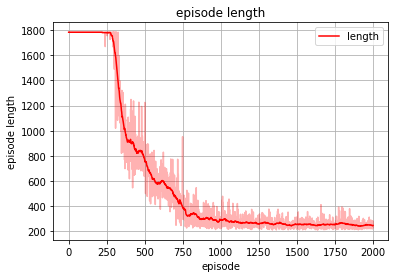

In [27]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, range=2000, savepath=img_path+file_name+'length')

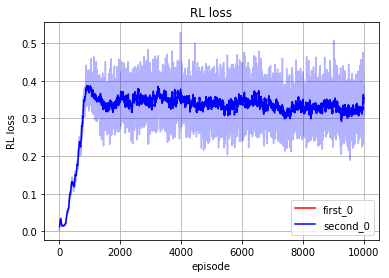

In [28]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/pettingzoo_boxing_v1_nfsp_NFSP_20210823163222
dict_keys(['episode_reward', 'loss', 'episode_length'])


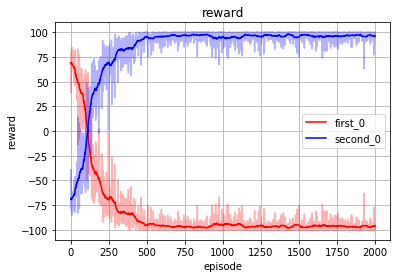

In [23]:
# exploit nfsp, boxing, well-trained, average policy
file_name =  'pettingzoo_boxing_v1_nfsp_NFSP_20210823163222'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, range=2000, savepath=img_path+file_name+'reward')

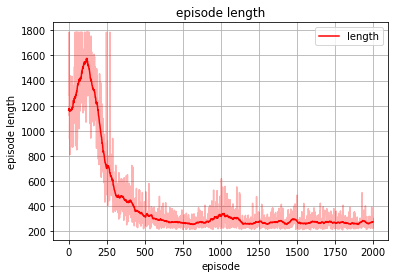

In [24]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, range=2000, savepath=img_path+file_name+'length')

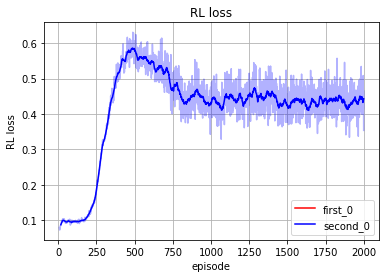

In [25]:
plot(data['loss'], 'RL loss', smooth_radius=10, range=2000, savepath=img_path+file_name+'loss')

log/pettingzoo_boxing_v1_nfsp_NFSP_20210823195838
dict_keys(['episode_reward', 'loss', 'episode_length'])


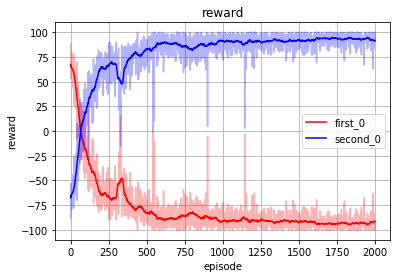

In [33]:
# exploit nfsp, boxing, well-trained, best response policy
file_name =  'pettingzoo_boxing_v1_nfsp_NFSP_20210823195838'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, range=2000, savepath=img_path+file_name+'reward')

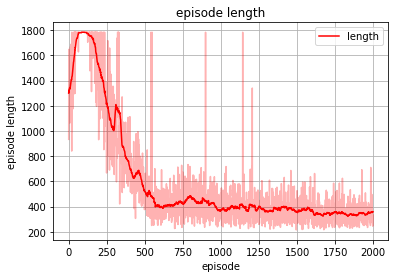

In [34]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, range=2000, savepath=img_path+file_name+'length')

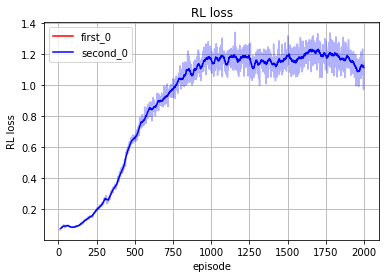

In [35]:
plot(data['loss'], 'RL loss', smooth_radius=10, range=2000, savepath=img_path+file_name+'loss')

log/lasertag_LaserTag-small3-v0_nfsp_NFSP_20210820185940
dict_keys(['episode_reward', 'loss', 'episode_length'])


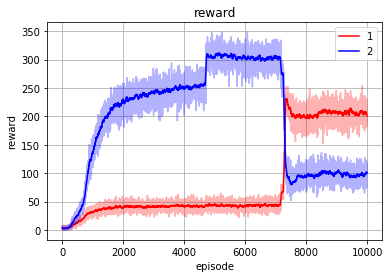

In [41]:
# train nfsp, lasertag
file_name =  'lasertag_LaserTag-small3-v0_nfsp_NFSP_20210820185940'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

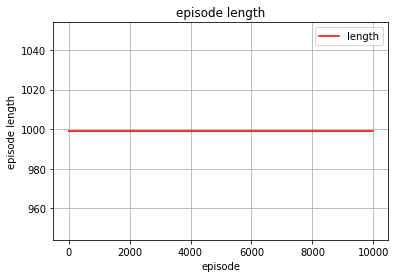

In [42]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

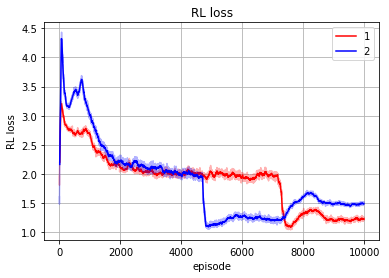

In [43]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/lasertag_LaserTag-small3-v0_nfsp_NFSP_20210824110514
dict_keys(['episode_reward', 'loss', 'episode_length'])


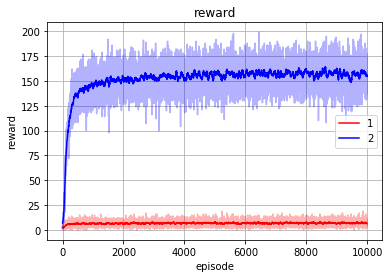

In [56]:
# exploit nfsp, lasertag, not trained, average policy
file_name =  'lasertag_LaserTag-small3-v0_nfsp_NFSP_20210824110514'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

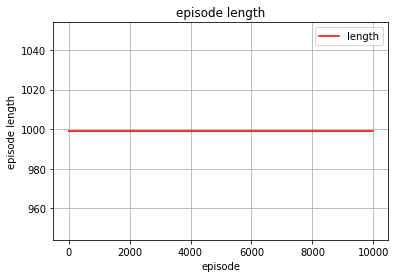

In [57]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

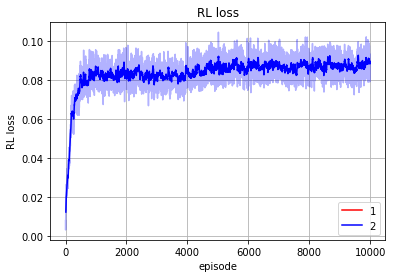

In [58]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/lasertag_LaserTag-small3-v0_nfsp_NFSP_20210823205316
dict_keys(['episode_reward', 'loss', 'episode_length'])


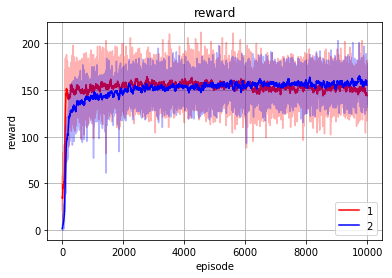

In [38]:
# exploit nfsp, lasertag, well-trained, best response policy
file_name =  'lasertag_LaserTag-small3-v0_nfsp_NFSP_20210823205316'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

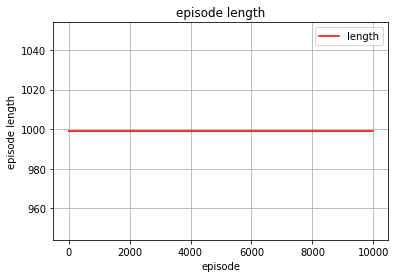

In [39]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

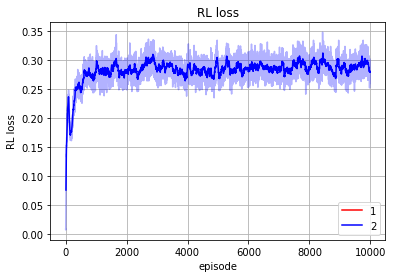

In [40]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/lasertag_LaserTag-small3-v0_nfsp_NFSP_20210824134349
dict_keys(['episode_reward', 'loss', 'episode_length'])


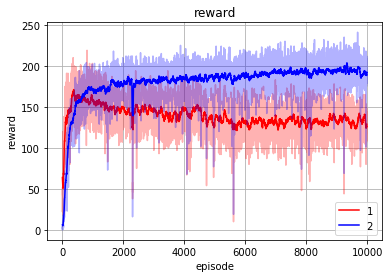

In [59]:
# exploit nfsp, lasertag, well-trained, average policy
file_name =  'lasertag_LaserTag-small3-v0_nfsp_NFSP_20210824134349'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

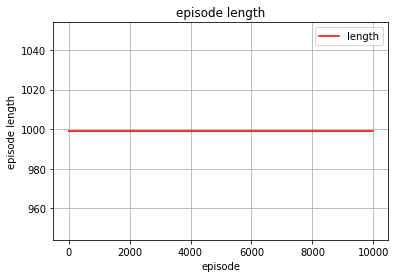

In [60]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

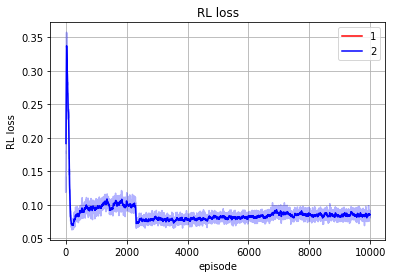

In [61]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/lasertag_LaserTag-small3-v0_nfsp_NFSP_20210902205815
dict_keys(['episode_reward', 'loss', 'episode_length'])


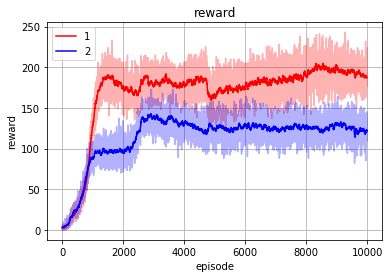

In [26]:
# nfsp, lasertag, use impala cnn architecture
file_name =  'lasertag_LaserTag-small3-v0_nfsp_NFSP_20210902205815'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

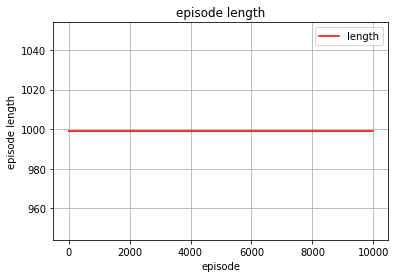

In [27]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

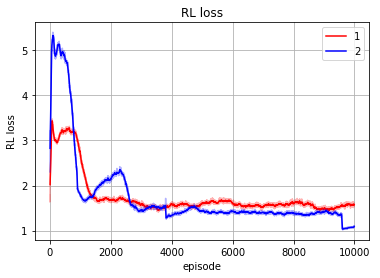

In [28]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210911143314
dict_keys(['episode_reward', 'loss', 'episode_length'])


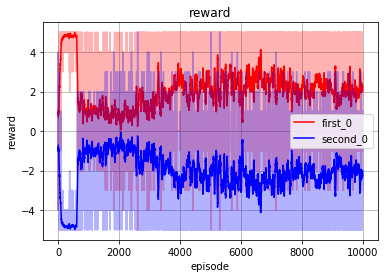

In [98]:
# exploit nash dqn exploiter, SlimeVolley, fix previous bug
file_name =  'slimevolley_SlimeVolley-v0_nash_NashDQNExploiter_20210911143314'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')

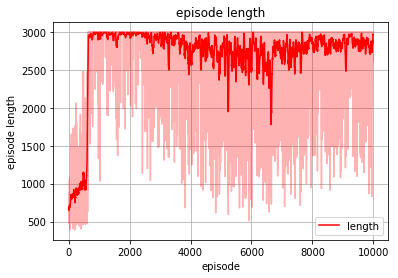

In [99]:
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')

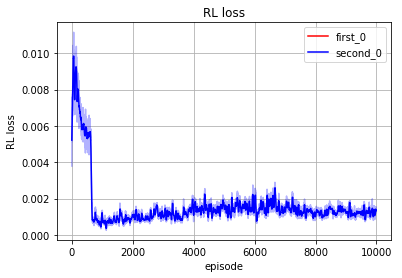

In [100]:
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210914112413
dict_keys(['episode_reward', 'loss', 'episode_length'])


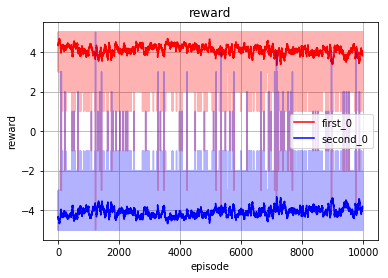

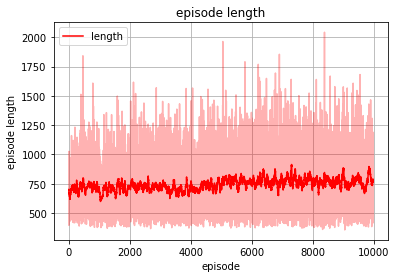

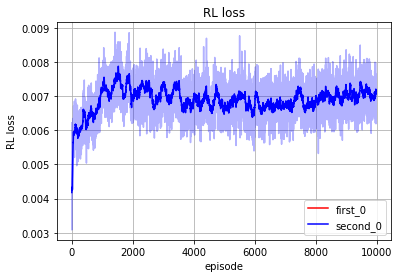

In [106]:
# exploit fsp, SlimeVolley
file_name =  'slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210914112413'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_nxdo_DQN_20210919232746
dict_keys(['episode_reward', 'loss', 'episode_length'])


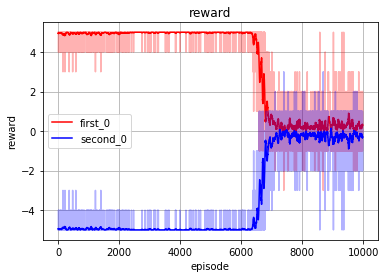

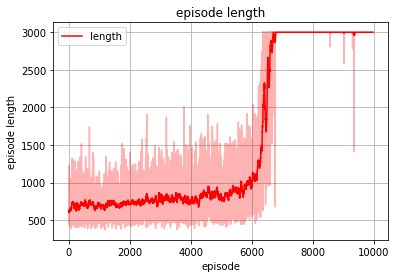

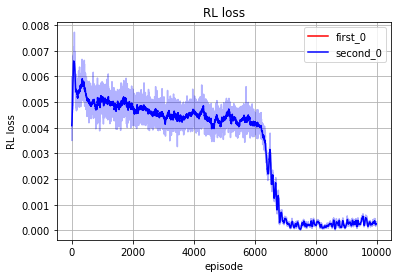

In [4]:
# exploit nxdo, SlimeVolley
file_name =  'slimevolley_SlimeVolley-v0_nxdo_DQN_20210919232746'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210919232841
dict_keys(['episode_reward', 'loss', 'episode_length'])


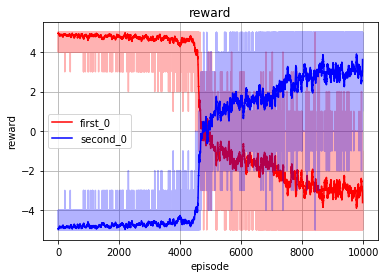

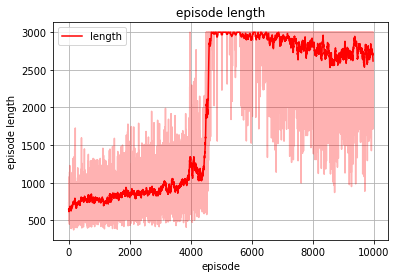

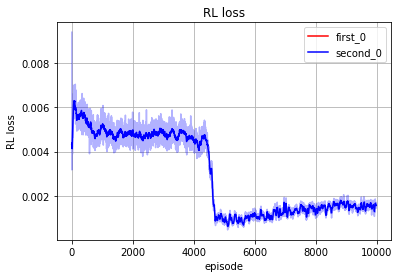

In [5]:
# exploit fsp, SlimeVolley
file_name =  'slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210919232841'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210920224002
dict_keys(['episode_reward', 'loss', 'episode_length'])


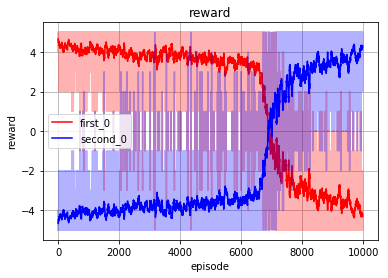

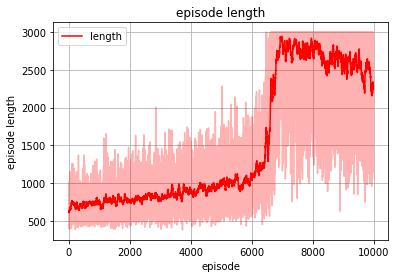

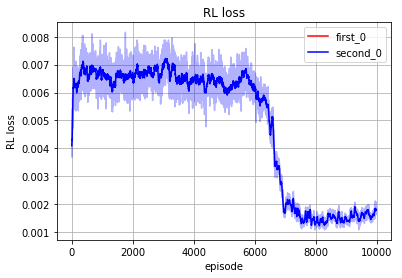

In [6]:
# exploit fsp, SlimeVolley
file_name =  'slimevolley_SlimeVolley-v0_fictitious_selfplay_DQN_20210920224002'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/pettingzoo_boxing_v1_selfplay_DQN_20211031222450
dict_keys(['episode_reward', 'loss', 'episode_length'])


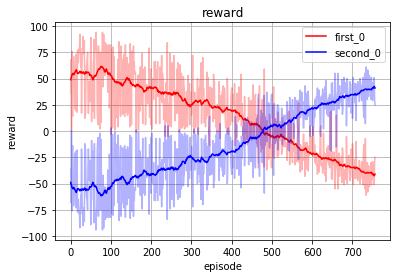

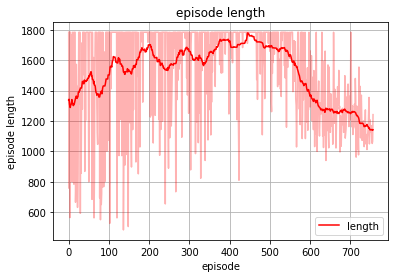

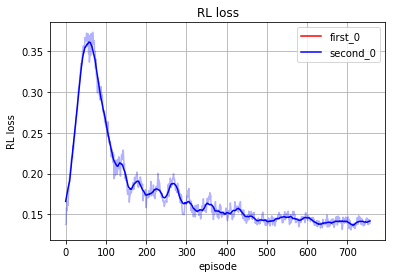

In [7]:
# a first unexploitable agent by sp on boxing
file_name =  'pettingzoo_boxing_v1_selfplay_DQN_20211031222450'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/0/pettingzoo_boxing_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


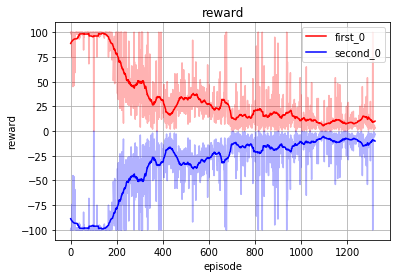

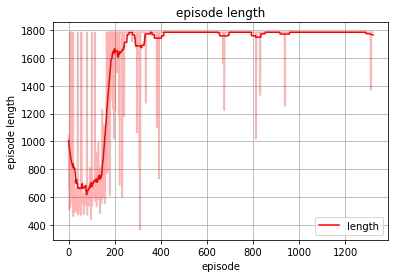

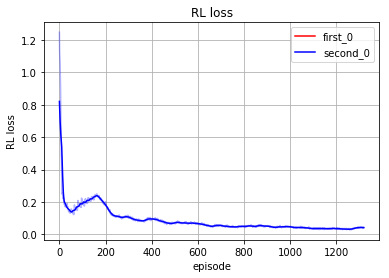

In [5]:
# a first unexploitable agent by sp on boxing
file_name =  '0/pettingzoo_boxing_v1_nash_dqn'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/0/pettingzoo_boxing_v1_nash_dqn_exploiter
dict_keys(['episode_reward', 'loss', 'episode_length'])


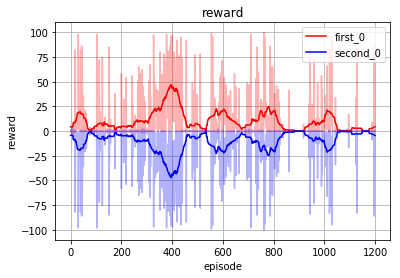

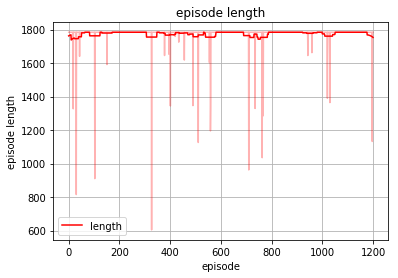

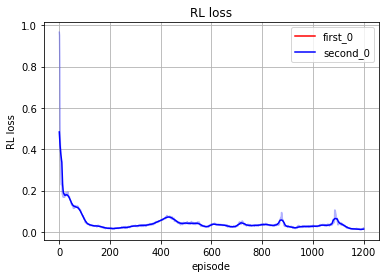

In [6]:
# a first unexploitable agent by sp on boxing
file_name =  '0/pettingzoo_boxing_v1_nash_dqn_exploiter'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

log/0/pettingzoo_surround_v1_nash_dqn
dict_keys(['episode_reward', 'loss', 'episode_length'])


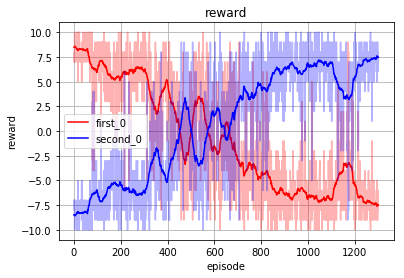

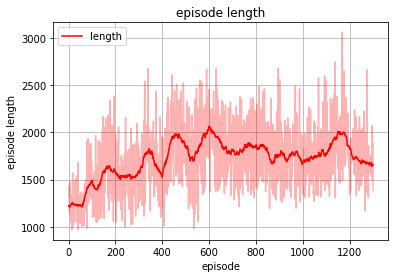

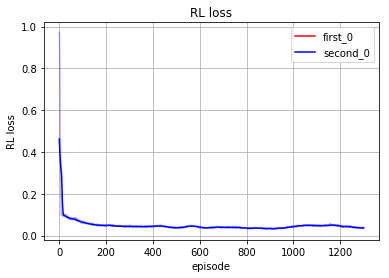

In [8]:
# a first unexploitable agent by sp on boxing
file_name =  '0/pettingzoo_surround_v1_nash_dqn'
data = load_data(file_name)
plot(data['episode_reward'], 'reward', smooth_radius=20, savepath=img_path+file_name+'reward')
plt.show()
plot({'length': data['episode_length']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
plt.show()
plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')

In [154]:
import itertools
def flatten(t):
    return [item for sublist in t for item in sublist]
a=[['first_0']]
if all(isinstance(i, list) for i in a):
    print(list(itertools.chain(*a)))


['first_0']


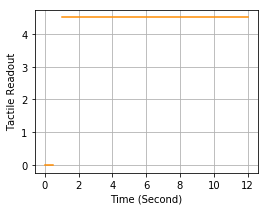

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,3)
x=np.arange(1.,12.5, 0.5)
y=23*[4.5]
plt.plot([0, 0.5],[0,0], c='darkorange')
plt.plot(x,y, c='darkorange')
plt.xlabel('Time (Second)')
plt.ylabel('Tactile Readout')
plt.grid()
plt.savefig('sim_readout.png',bbox_inches='tight', dpi=1000)

In [56]:
a=np.array([])
print(a.shape[0])
# a=np.concatenate([a,[3,4]])
a=np.append(a, [3])
print(a)


0
[3.]


In [77]:
a=np.array([[1,2]])
# np.hstack([a, [[3,4]]])
a=a.T
print(a)
row=np.array([3,4])
row=np.array([row]).T
# print()
a=np.hstack([a, row])
print(a)

[[1]
 [2]]
[[1 3]
 [2 4]]


In [17]:
class d:
    def __init__(self):
        self.f1()
    def f1(self, ):
        print(3)
#         self.f2() 

class f(d):
    def __init__(self):
        super().__init__()
        self.f1()
    def f1(self, ):
        print(1)
        self.f2()
        
    def f2(self):
        print(2)
        
f()

1
2
1
2


In [85]:
import numpy as np
m=np.array([[0.]])
def up(m, r):
    m = np.vstack((m, r))
    r_ = np.concatenate((-r, [0]))
    print('m: ', m, r_)
    m = np.hstack((m, r_.reshape(len(r_), 1)))
    return m
  
for i in range(1,3):
    r=np.arange(1, i+1)
    print(m, r)
    m=up(m, r)
    print(m)


[[0.]] [1]
m:  [[0.]
 [1.]] [-1  0]
[[ 0. -1.]
 [ 1.  0.]]
[[ 0. -1.]
 [ 1.  0.]] [1 2]
m:  [[ 0. -1.]
 [ 1.  0.]
 [ 1.  2.]] [-1 -2  0]
[[ 0. -1. -1.]
 [ 1.  0. -2.]
 [ 1.  2.  0.]]


In [102]:
a=1
a in [0,2]

False